# Analyzing the Titanic Dataset
by Kevin Vo

In [1]:
# Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

### I. TIDY DATA

* The given data is:

In [2]:
# Import titanic data into a data frame
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


However, the data contains too many variables. Since our interest is factors made people more likely to survive, therefore I will remove these variables from the dataset: **Name, SibSp, Parch, Ticket**, also **Cabin** (I have looked at all the values of Cabin. There is not enough information that need to consider this as a factor) and **Embarked**.

In [3]:
titanic_df.drop(['SibSp','Parch','Ticket','Cabin','Embarked','Name'], axis = 1, inplace = True)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500


Currently, the dimension of Titanic data frame is:

In [4]:
titanic_df.shape

(891, 6)

* **Missing Data**: Let's check how many NAs are there in each variable(column)

In [5]:
if True:
    def number_of_NA(column):
        return column.size - column.dropna(axis = 0).size
    print titanic_df.apply(number_of_NA)

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
dtype: int64


So only **Age** contains 177 *NA*. We should only drop these NAs when we analyze **Survived** condtion by **Age** separately. Therefore, we will handle this issue later.

### II. DATA EXPLORATION & VISUALIZATION

* **SURVIVED AND AGE**:

Histogram of Age grouped by Surival Condition

Populating the interactive namespace from numpy and matplotlib


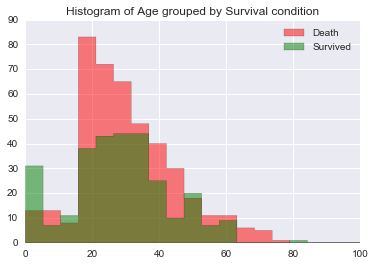

Figure 1


In [6]:
%pylab inline
bins = numpy.linspace(0,100,20)
plt.hist(titanic_df.groupby('Survived').get_group(0)['Age'].dropna(axis = 0),
         bins,histtype='stepfilled',alpha=0.5, color = 'r', label = 'Death')
plt.hist(titanic_df.groupby('Survived').get_group(1)['Age'].dropna(axis = 0),
         bins,histtype='stepfilled',alpha=0.5, color = 'g', label = 'Survived')
plt.title("Histogram of Age grouped by Survival condition")
plt.legend(loc = 'upper right')
plt.show()
print "Figure 1"

The histogram tells us:
    + Children are more likely to survive.
    + Adults has less chance to survive.
    
**Question:** Are Death and Survived indifferent at any age?

* **SURVIVED AND PCLASS & FARE**:

It is clear that the first class passengers will spend more in fare

Figure 2


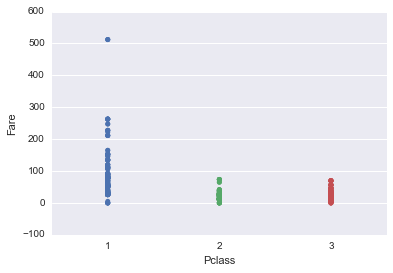

In [7]:
g = sns.stripplot(x = "Pclass", y = "Fare", data = titanic_df)
print "Figure 2"

So we can choose one of them as a factor that made people more likely to survive. Let's take a look at **Survived** and **Pclass**:

Figure 3


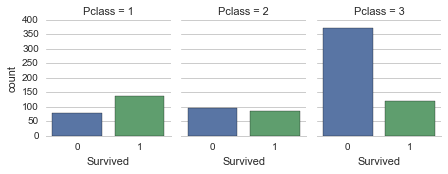

In [8]:
sns.set_style("whitegrid")
g = sns.factorplot('Survived', col = 'Pclass', col_wrap = 4, data = titanic_df, kind = 'count', size = 2.5, aspect = .8)
sns.despine(left=True)
print "Figure 3"

The above chart tells us that people who are poor or lower class were more likely to die.

* **SURVIVED AND SEX**:

Figure 4


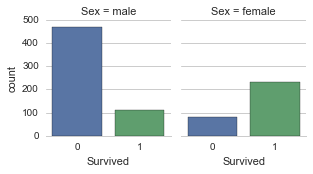

In [9]:
sns.set_style("whitegrid")
g = sns.factorplot('Survived', col = 'Sex', col_wrap = 4, data = titanic_df, kind = 'count', size = 2.5, aspect = .8)
sns.despine(left=True)
print "Figure 4"

The above chart tells us that male is more likely to die.

### III. STATISTICAL TEST

#### 1. SURVIVED AND AGE:

#### a. What is our independent vairable? What is our dependent vairable?

* The **independent variable** is the **survival** condition: *non-survived(death)* or *survived*

* The **dependent variable** is the **Age** of each person in each survival condition group.

#### b. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

##### b1)  Hypothesis:

**Null Hypothesis**:
<u>The two populations represented by the two conditions( survived group and non-survived group) have the same distribution of age.</u> 

$H_o$: `Age values of two datasets(survived vs non-survived) come from the same population.`

$H_a$: `Non-survived group tend to have larger Age values than survived group.`

##### b2)  A statistical test is proposed which will distinguish the proposed hypotheses. Any assumptions made by the statistical test are addressed.

The **Mann-Whitney U test** is used as a statistical test for this proposed hypothesis. It is chosen based on these following assumptions:

* Assumption \#1: Dependent variable should be measured at the ordinal or continuous level. In this case, age is a continuous variable.

* Assumption \#2: Independent variable should consist of two categorical, independent groups. Our independent variable is surival condtion which is separated by two categorical independent groups: from survived to non-survived.

* Assumption \#3: Independence of observations. It is satisfied because there is not any one who could be in both non-survived group and survived group.

* Assumption \#4:  A Mann-Whitney U test can be used when your two variables are not normally distributed. Based on Figure 1, we can see that the histogram of both groups are not symmetric. They are skewed to the right.

#### c. Testing:

In [10]:
with_survived_mean = mean(titanic_df.groupby('Survived').get_group(1)['Age'].dropna(axis = 0))
with_non_survived_mean = mean(titanic_df.groupby('Survived').get_group(0)['Age'].dropna(axis = 0))

U, p = stat.mannwhitneyu(titanic_df.groupby('Survived').get_group(0)['Age'].dropna(axis = 0),
                         titanic_df.groupby('Survived').get_group(1)['Age'].dropna(axis = 0))
print "Mean age of Survived group is: ", with_survived_mean
print "Mean age of Non-Survived group is:", with_non_survived_mean
print "U-statistic: ", U
print "p-value :", p

Mean age of Survived group is:  28.3436896552
Mean age of Non-Survived group is: 30.6261792453
U-statistic:  65278.0
p-value : 0.160492524777


U-statistic is very high and the p-value = 0.16 > 0.05 

**=>** We fail to reject the null hypothesis at 5% significant level.

**Conclusion:** <u>Based on the provided data, We are 95% confident to conclude that age has no effect on survival condition.</u>


#### 2. SURVIVED AND PCLASS:

#### a. What is our independent vairable? What is our dependent vairable?

* The **independent variable** is the **survival** condition: *non-survived(death)* or *survived*

* The **dependent variable** is the **Pclass** which is social economic status: 1 = Upper, 2 = Middle, 3 = Lower.

#### b. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

##### b1)  Hypothesis:

**Null Hypothesis**:
<u>In the population, the two categorical variables are independent.</u> 

$H_o$: `In the population, survival variable and Pclass variable are independent.`

$H_a$: `In the population, survival variable and Pclass variable are associated (dependent).`

##### b2)  A statistical test is proposed which will distinguish the proposed hypotheses. Any assumptions made by the statistical test are addressed.

The **Chi-square Test of Independece** is used as a statistical test for this proposed hypothesis. It is chosen because:

* Independent and dependent variable are catergorical.
* It is a 2x2 contigency table (each case contribute to 1 cell only)
* The sample data is large enough.
* Each cell in the frequency table is larger than 5 ( Frequency table is shown below)

In [11]:
print "Frequency Table is:"
titanic_df[['Survived','Pclass']].pivot_table(columns= ['Pclass'],index=['Survived'],aggfunc= len, margins = True)

Frequency Table is:


Pclass,1,2,3,All
Survived,,,,
0,80.0,97.0,372.0,549.0
1,136.0,87.0,119.0,342.0
All,216.0,184.0,491.0,891.0


<u><b>Notice:</b></u> From the frequency table, we can see a magnitude difference of people who are from lower social class did not survive compared to others. 

#### c. Testing:

In [12]:
chi2, p, ddof, expected = stat.chi2_contingency(
    titanic_df[['Survived','Pclass']].pivot_table(columns= ['Pclass'],index=['Survived'],aggfunc= len))
expected = pd.DataFrame(expected, index = [0,1], columns = [1,2,3])
expected.index.names = ['Survived']
expected.columns.names = ['Pclass']
msg = """
Test Statistic X^2: {}\np-value: {}\nDegrees of Freedom: {}
==================================================
\n\t\tExpected table"""
print( msg.format( chi2, p, ddof) )
display(expected)


Test Statistic X^2: 102.888988757
p-value: 4.5492517113e-23
Degrees of Freedom: 2

		Expected table


Pclass,1,2,3
Survived,,,
0,133.090909,113.373737,302.535354
1,82.909091,70.626263,188.464646


As expected, Chi-squared Statistics is very high, and p-value is extremely close to zero. 

**=>** We reject the null hypothesis at 5% significant level.

**Conclusion:** <u>Based on the provided data, we are 95% confident to conclude that there is associated effect of Social Economics Class on Survival Condition. </u>

#### 3. SURVIVED AND SEX:

#### a. What is our independent vairable? What is our dependent vairable?

* The **independent variable** is the **survival** condition: *non-survived(death)* or *survived*

* The **dependent variable** is the **Sex** which contains values as: female and male.

#### b. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

##### b1)  Hypothesis:

**Null Hypothesis**:
<u>In the population, the two categorical variables are independent.</u> 

$H_o$: `In the population, survival variable and Sex variable are independent.`

$H_a$: `In the population, survival variable and Sex variable are associated (dependent).`

##### b2)  A statistical test is proposed which will distinguish the proposed hypotheses. Any assumptions made by the statistical test are addressed.

The **Chi-square Test of Independece** is used as a statistical test for this proposed hypothesis. It is chosen because:

* Independent and dependent variable are catergorical.
* It is a 2x2 contigency table (each case contribute to 1 cell only)
* The sample data is large enough.
* Each cell in the frequency table is larger than 5 ( Frequency table is shown below)

In [13]:
print "Frequency Table is:"
titanic_df[['Survived','Sex']].pivot_table(columns= ['Sex'],index=['Survived'],aggfunc= len, margins = True)

Frequency Table is:


Sex,female,male,All
Survived,,,
0,81.0,468.0,549.0
1,233.0,109.0,342.0
All,314.0,577.0,891.0


<u><b>Notice:</b></u> From the frequency table, we can see a magnitude difference of non-survived male compared to others. 

#### c.Testing

In [14]:
chi2, p, ddof, expected = stat.chi2_contingency(
    titanic_df[['Survived','Sex']].pivot_table(columns= ['Sex'],index=['Survived'],aggfunc= len))
expected = pd.DataFrame(expected, index = [0,1], columns = ['female','male'])
expected.index.names = ['Survived']
expected.columns.names = ['Sex']
msg = """
Test Statistic X^2: {}\np-value: {}\nDegrees of Freedom: {}
==================================================
\n\t\tExpected table"""
print( msg.format( chi2, p, ddof) )
display(expected)


Test Statistic X^2: 260.717020167
p-value: 1.19735706278e-58
Degrees of Freedom: 1

		Expected table


Sex,female,male
Survived,,
0,193.474747,355.525253
1,120.525253,221.474747


As expected, Chi-squared Statistics is very high, and p-value is extremely close to zero. 

**=>** We reject the null hypothesis at 5% significant level.

**Conclusion:** <u>Based on the provided data, we are 95% confident to conclude that there is associated effect of Gender on Survival Condition. </u>

### IV. FINAL CONCLUSION:

**Based on the given data, we have very little evidence to conclude that age has any effect on survival condition. In the other way, gender and social economics class has an effect on survival condition. From the above frequency tables, we can see that people who are at lower class are more likely to die or female are more likely to survive**